# Nowcasting Starter Notebook

In this notebook, a dataset containing new vehicle sales (Naamsa) is used to predict the CPI values. This notebook only contains one simple linear regression model, however, you are tasked to predict all the sub-categories of CPI as well as the overall CPI value. Therefore, you potentially could have 13 models. The notebook also contains a simple way to predict sub-category CPI values using historic values.

#### Step 1: Import Libraries

In programming, we often use pre-built libraries that contain useful functions and tools for our specific task. In the code snippet below are examples containing such library imports.

The first library, pandas, provides tools for working with structured data, while the second library, numpy, provides powerful numerical computing tools. The third library, matplotlib, allows us to create visualizations of our data, and the fourth library, datetime, provides functions for working with dates and times. Lastly, we are importing specific functions from the scikit-learn library, including train_test_split for splitting our data into training and testing sets, mean_squared_error for evaluating the performance of our model, LinearRegression for fitting a linear regression model, and StandardScaler for standardizing our data. By importing these libraries, we have access to a range of useful tools and functions that will help us in our programming task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#### Import the dataset

You should change the name: "New_Vehicle_Sales_(Naamsa).csv" to your filepath of your file.

In [2]:
df = pd.read_csv("Naamsa_Vehicle_Sales.csv")
cpi_values = pd.read_csv("CPI_Historic_Values_Zindi_Feb_23.csv")
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

Add the dates to the dataset.

In [3]:
# start date
start_date = datetime.datetime.strptime("2021-01-01", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2023-03-01", "%Y-%m-%d")

# difference between each date. MS means one month
D = 'MS'

date_list = pd.date_range(start_date, end_date, freq=D)[::-1]

Rename the Month column in the dataframe to Date

In [4]:
df['Month'] = date_list
df = df.rename(columns={'Month': 'Date'})

Change the Date column values to datetime format so that Python can understand that it is a date value.

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%b-%d')

Create a filter to filter only for a certain date range as the values in the CPI Historic are only in this range.

In [6]:
df = df[(df['Date'] < '2023-03-01') & (df['Date'] >= '2022-01-01') ]
df['CPI'] = cpi_values.loc[cpi_values['Category'] == 'Headline_CPI', 'Value'].tolist()

We can plot how the series has changed over time. The library we are using here is ggplot.

(array([18993., 19052., 19113., 19174., 19236., 19297., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

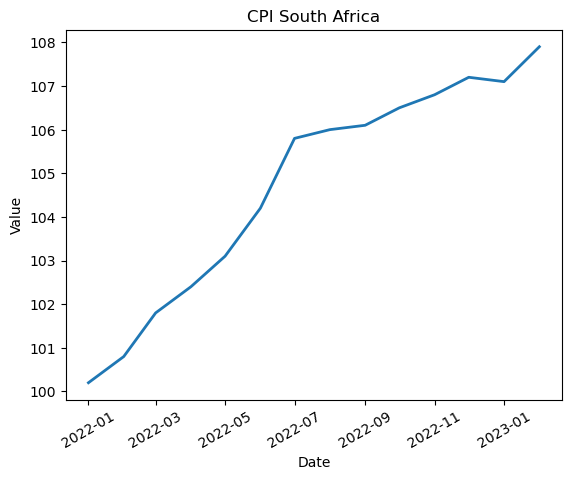

In [7]:
plt.plot(df['Date'], df['CPI'], linewidth=2)
plt.title('CPI South Africa')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation = 30)

A linear regression model unfortunately does not work with the Date as an object, therefore, we can use this line to convert it to a numerical value for the linear regression model.

In [8]:
df['Date']=df['Date'].map(datetime.datetime.toordinal)

In machine learning, a training set is a subset of data used to train a model, while a test set is a subset of data used to evaluate the performance of the trained model on new, unseen data. The training set is used to fit the model parameters, while the test set is used to estimate how well the model generalizes to new data. Here we can split the dataset into a training and test set with a ratio of 80:20.

In [9]:
y = df['CPI']
X = df.drop('CPI', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Finally, we can fit our model using our training set.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We can use the predict attribute to predict the CPI for the test set.

In [11]:
predictions = model.predict(X_test)

We can use the mean squared error function from the sklearn package to calculate the RMSE of the model.

In [12]:
mean_squared_error(y_test,predictions)

1.1541796452110524

### Training the model on historical data and then predicting February 2023 CPI

Import dataset and change Date column to datetime object

In [13]:
df = pd.read_csv("Naamsa_Vehicle_Sales.csv")
cpi_values = pd.read_csv("CPI_Historic_Values_Zindi_Feb_23.csv")
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

In [14]:
# start date
start_date = datetime.datetime.strptime("2021-01-01", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2023-03-01", "%Y-%m-%d")

# difference between each date. MS means one motnh
D = 'MS'

date_list = pd.date_range(start_date, end_date, freq=D)[::-1]

In [15]:
df['Month'] = date_list
df = df.rename(columns={'Month': 'Date'})
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%b-%d')
df = df[(df['Date'] < '2023-03-01') & (df['Date'] >= '2022-01-01') ]
df['CPI'] = cpi_values.loc[cpi_values['Category'] == 'Headline_CPI', 'Value'].tolist()

Remove the data for February from the dataset

In [16]:
mask = (df["Date"] == "2023-02-01")
february = df[mask] 
df = df[~mask]

Splitting remaining data into a train and test set

In [17]:
X = df.drop('CPI', axis=1)
y = df['CPI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train['Date']=X_train['Date'].map(datetime.datetime.toordinal)
X_test['Date']=X_test['Date'].map(datetime.datetime.toordinal)
february['Date'] = february['Date'].map(datetime.datetime.toordinal)

Fit the model using the training data

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Use the model to predict the February CPI value and calculate RMSE

In [19]:
predictions = model.predict(february.drop(columns=['CPI']))
mean_squared_error(february['CPI'],predictions)  

0.013235860716584039

## Sub-category prediction model example:

The headline CPI value consists of a weighted sum of 12 sub-categories. Therefore, a prediction should be made for each of the 12 sub-categories. For this first starter notebook, a simple weighted calculation will be used to calculate a given sub-category CPI value.

In [20]:
df = pd.read_csv('CPI_Historic_Values_Zindi.csv')
cpi_weights = pd.read_excel('cpi_weights.xlsx')
categories = df['Category'].unique()
df['Month'] = pd.to_datetime(df['Month'], format='%d-%m-%Y')
df.sort_values(by='Month', inplace = True, ascending= False)

Obtain the most recent cpi and sub-category values by creating a filter. This code snippet produces all the data from January 2023.

In [21]:
recent_cpi_values = df.loc[df['Month'] >= '01-01-2023']

The following code uses a weighting system, giving most weight to the most recent sub-category CPI values, to predict the change in the CPI values for February:

In [22]:
cpi_dict = {}

for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category].copy()  

    filtered_df['Month'] = pd.to_datetime(filtered_df['Month'], format='%d-%m-%Y')
    filtered_df.sort_values(by='Month', inplace=True, ascending=False)
    
    weights = 0.5 * pd.Series([0.5**i for i in range(len(filtered_df))])
    
    filtered_df['Weighted Percentage Change'] = weights.values * filtered_df['Percentage Change (From Prior Month)']
    cpi_value = filtered_df['Weighted Percentage Change'].sum()
    cpi_dict[category] = cpi_value
    if category != 'Headline_CPI':
        print(f'February weighted sub-category CPI percentage change for {category} is: {round(cpi_value,2)}')

February weighted sub-category CPI percentage change for Transport is: -1.46
February weighted sub-category CPI percentage change for Food and non-alcoholic beverages is: 1.18
February weighted sub-category CPI percentage change for Miscellaneous goods and services is: 0.38
February weighted sub-category CPI percentage change for Restaurants and hotels  is: -0.3
February weighted sub-category CPI percentage change for Education is: 0.0
February weighted sub-category CPI percentage change for Communication is: 0.04
February weighted sub-category CPI percentage change for Recreation and culture is: 0.19
February weighted sub-category CPI percentage change for Health is: 0.13
February weighted sub-category CPI percentage change for Household contents and services is: 0.57
February weighted sub-category CPI percentage change for Housing and utilities is: 0.12
February weighted sub-category CPI percentage change for Clothing and footwear is: 0.13
February weighted sub-category CPI percentag

We can now calculate the Headline CPI values now that we predicted the change in each sub-category CPI value. We combine the weights from StatsSA and the previous months sub-category CPI value to calculate the Headline CPI value for February:

In [23]:
weighted_cpi_value = 0
for category in cpi_dict.keys():
    weight = cpi_weights.loc[cpi_weights['Category'] == category, 'Weight'].values[0]
    change = recent_cpi_values.loc[recent_cpi_values['Category'] == category, 'Value'].values[0]
    cpi_value = (cpi_dict[category] + change) * weight/100
    if category != 'Headline_CPI':
        weighted_cpi_value += cpi_value
cpi_dict['Headline_CPI'] = round(weighted_cpi_value, 2)
print(f'The predicted February value for the Headline CPI is {round(weighted_cpi_value,2)}.')

The predicted February value for the Headline CPI is 107.19.


We follow the same idea to predict the sub-category CPI values for March by using an extrapolated the results from February.

In [24]:
cpi_dict = {}
cpi_percentage_change = {}
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category].copy()  

    filtered_df['Month'] = pd.to_datetime(filtered_df['Month'], format='%d-%m-%Y')
    filtered_df.sort_values(by='Month', inplace=True, ascending=False)
    
    weights = 0.5 * pd.Series([0.5**i for i in range(len(filtered_df))])
    
    filtered_df['Weighted Percentage Change'] = weights.values * filtered_df['Percentage Change (From Prior Month)'] * 2
    cpi_value = filtered_df['Weighted Percentage Change'].sum()
    cpi_dict[category] = cpi_value
    if category != 'Headline_CPI':
        print(f'March weighted sub-category CPI percentage change for {category} is: {round(cpi_value,2)}')

March weighted sub-category CPI percentage change for Transport is: -2.91
March weighted sub-category CPI percentage change for Food and non-alcoholic beverages is: 2.36
March weighted sub-category CPI percentage change for Miscellaneous goods and services is: 0.77
March weighted sub-category CPI percentage change for Restaurants and hotels  is: -0.6
March weighted sub-category CPI percentage change for Education is: 0.0
March weighted sub-category CPI percentage change for Communication is: 0.08
March weighted sub-category CPI percentage change for Recreation and culture is: 0.38
March weighted sub-category CPI percentage change for Health is: 0.25
March weighted sub-category CPI percentage change for Household contents and services is: 1.14
March weighted sub-category CPI percentage change for Housing and utilities is: 0.23
March weighted sub-category CPI percentage change for Clothing and footwear is: 0.26
March weighted sub-category CPI percentage change for Alcoholic beverages and

Here we again calculate the Headline CPI value for March by using the weights from StatsSA.

In [25]:
weighted_cpi_value = 0
for category in cpi_dict.keys():
    weight = cpi_weights.loc[cpi_weights['Category'] == category, 'Weight'].values[0]
    change = recent_cpi_values.loc[recent_cpi_values['Category'] == category, 'Value'].values[0]
    cpi_value_new = cpi_dict[category] + change
    cpi_value_weighted = cpi_value_new * weight/100
    cpi_dict[category] = round(cpi_value_new, 2)
    if category != 'Headline_CPI':
        weighted_cpi_value += cpi_value_weighted
cpi_dict['Headline_CPI'] = round(weighted_cpi_value, 2)
print(f'The predicted March value for the headline CPI is {round(weighted_cpi_value,2)}.')

The predicted March value for the headline CPI is 107.31.


We follow the same idea to predict the sub-category CPI values for April by using an extrapolated the results from February.

In [26]:
cpi_dict = {}
cpi_percentage_change = {}
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category].copy()  

    filtered_df['Month'] = pd.to_datetime(filtered_df['Month'], format='%d-%m-%Y')
    filtered_df.sort_values(by='Month', inplace=True, ascending=False)
    
    weights = 0.5 * pd.Series([0.5**i for i in range(len(filtered_df))])
    
    filtered_df['Weighted Percentage Change'] = weights.values * filtered_df['Percentage Change (From Prior Month)'] * 3
    cpi_value = filtered_df['Weighted Percentage Change'].sum()
    cpi_dict[category] = cpi_value
    if category != 'Headline_CPI':
        print(f'April weighted sub-category CPI percentage change for {category} is: {round(cpi_value,2)}')

April weighted sub-category CPI percentage change for Transport is: -4.37
April weighted sub-category CPI percentage change for Food and non-alcoholic beverages is: 3.54
April weighted sub-category CPI percentage change for Miscellaneous goods and services is: 1.15
April weighted sub-category CPI percentage change for Restaurants and hotels  is: -0.89
April weighted sub-category CPI percentage change for Education is: 0.01
April weighted sub-category CPI percentage change for Communication is: 0.12
April weighted sub-category CPI percentage change for Recreation and culture is: 0.57
April weighted sub-category CPI percentage change for Health is: 0.38
April weighted sub-category CPI percentage change for Household contents and services is: 1.71
April weighted sub-category CPI percentage change for Housing and utilities is: 0.35
April weighted sub-category CPI percentage change for Clothing and footwear is: 0.39
April weighted sub-category CPI percentage change for Alcoholic beverages a

Lastly, we calculate the Headline CPI value for April. 

In [27]:
weighted_cpi_value = 0
for category in cpi_dict.keys():
    weight = cpi_weights.loc[cpi_weights['Category'] == category, 'Weight'].values[0]
    change = recent_cpi_values.loc[recent_cpi_values['Category'] == category, 'Value'].values[0]
    cpi_value_new = cpi_dict[category] + change
    cpi_value_weighted = cpi_value_new * weight/100
    cpi_dict[category] = round(cpi_value_new, 2)
    if category != 'Headline_CPI':
        weighted_cpi_value += cpi_value_weighted

cpi_dict['Headline_CPI'] = round(weighted_cpi_value, 2)
print(f'The predicted April value for the headline CPI is {round(weighted_cpi_value,2)}.')

The predicted April value for the headline CPI is 107.44.


Now to get the results ready for submission:

In [28]:
cpi_predictions = pd.DataFrame(list(cpi_dict.items()), columns=['ID', 'Value'])
cpi_predictions['ID'] = 'April_' + cpi_predictions['ID']

Output to excel file:

In [29]:
cpi_predictions.to_excel('Zindi_CPI_Predictions_April.xlsx', index = 0)